# Выбор локации для скважины

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

## Загрузка и подготовка данных

In [1]:
import pandas as pd
import numpy as np
from scipy import stats as st
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

Первым делом изучим данные на наличие пропусков, дубликатов и аномалий

### Geo Data 0

In [2]:
data_0 = pd.read_csv('/datasets/geo_data_0.csv')
data_0.head()

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


In [3]:
data_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [4]:
data_0.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


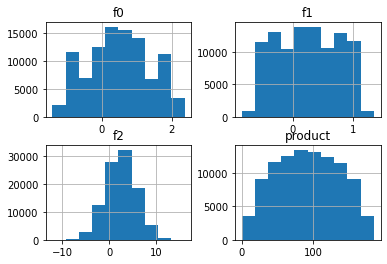

In [5]:
data_0.hist()
plt.show()

### Geo Data 1

In [6]:
data_1 = pd.read_csv('/datasets/geo_data_1.csv')
data_1.head()

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


In [7]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [8]:
data_1.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


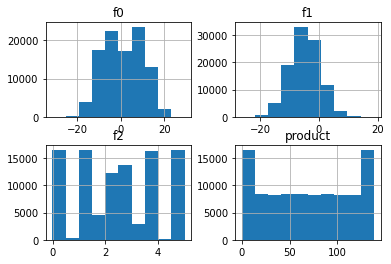

In [9]:
data_1.hist()
plt.show()

### Geo Data 2

In [10]:
data_2 = pd.read_csv('/datasets/geo_data_2.csv')
data_2.head()

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


In [11]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [12]:
data_2.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


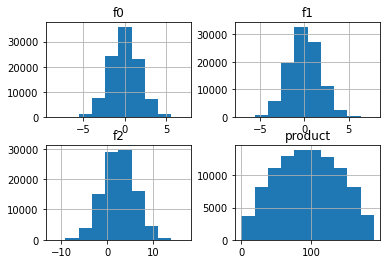

In [13]:
data_2.hist()
plt.show()

Видим, что данные абсолютно корректны и готовы к работе.

## Обучение и проверка модели

Напишем общую функцию по построению моделей для всех датасетов

In [14]:
def build_model(data):
    target = data['product']
    features = data.drop(['id', 'product'], axis=1)
    
    features_train, features_valid, target_train, target_valid = \
    train_test_split(features, target, test_size=0.25, random_state=42)
    
    numeric = ['f0', 'f1', 'f2']
    scaler = StandardScaler()
    scaler.fit(features_train[numeric])
    features_train[numeric] = scaler.transform(features_train[numeric])
    features_valid[numeric] = scaler.transform(features_valid[numeric])
    
    model = LinearRegression()
    model.fit(features_train, target_train)
    predicted_valid = pd.Series(model.predict(features_valid))
    
    mean_predicted_valid = predicted_valid.mean()
    rmse = mean_squared_error(target_valid, predicted_valid)**0.5
    
    return target_valid, predicted_valid, mean_predicted_valid, rmse

In [15]:
target_valid_0, predicted_valid_0, mean_predicted_valid_0, rmse_0 = build_model(data_0)
target_valid_1, predicted_valid_1, mean_predicted_valid_1, rmse_1 = build_model(data_1)
target_valid_2, predicted_valid_2, mean_predicted_valid_2, rmse_2 = build_model(data_2)

In [16]:
print(f'В регионе №0 средний запас предсказанного сырья = {mean_predicted_valid_0}, RMSE = {rmse_0}.')
print(f'В регионе №1 средний запас предсказанного сырья = {mean_predicted_valid_1}, RMSE = {rmse_1}.')
print(f'В регионе №2 средний запас предсказанного сырья = {mean_predicted_valid_2}, RMSE = {rmse_2}.')

В регионе №0 средний запас предсказанного сырья = 92.39879990657768, RMSE = 37.75660035026169.
В регионе №1 средний запас предсказанного сырья = 68.7128780391376, RMSE = 0.8902801001028846.
В регионе №2 средний запас предсказанного сырья = 94.77102387765939, RMSE = 40.145872311342174.


Наиболее высокий средний запас сырья, как и показатель среднеквадратичной ошибки, оказался в регионе №2.  
В следствие чего сложно пытаться делать какие-то предварительные выводы.  
Следует рассчитать прибыль и риски, изучить месторождения детальнее. 

## Подготовка к расчёту прибыли

In [17]:
TOTAL_POINTS = 500
SELECTED_POINTS = 200
REGION_BUDGET = 10000 #млн. руб.
INCOME_PER_BARREL = 0.45 #млн. руб. на 1 тыс. баррелей
LOSS_PROBABILITY_THRESHOLD = 0.025

In [18]:
min_product_quantity = REGION_BUDGET / SELECTED_POINTS / INCOME_PER_BARREL
print(f'Объём сырья для безубыточной разработки новой скважины: \
{round(min_product_quantity, 2)} тысяч баррелей.')

Объём сырья для безубыточной разработки новой скважины: 111.11 тысяч баррелей.


## Расчёт рисков и прибыли

In [19]:
def calculate_income(target_valid, predictions_valid):
    pred_sorted = predictions_valid.sort_values(ascending=False).head(200)
    target_selected = target_valid.reset_index(drop=True)[pred_sorted.index]
    income = target_selected.sum() * INCOME_PER_BARREL
    return income - REGION_BUDGET

In [20]:
print('Прибыль в 200 скважинах, выбранных по предсказаниям модели:')
print(f'Регион №0 = {calculate_income(target_valid_0, predicted_valid_0)} млн. руб.')
print(f'Регион №1 = {calculate_income(target_valid_1, predicted_valid_1)} млн. руб.')
print(f'Регион №2 = {calculate_income(target_valid_2, predicted_valid_2)} млн. руб.')

Прибыль в 200 скважинах, выбранных по предсказаниям модели:
Регион №0 = 3359.1411144621798 млн. руб.
Регион №1 = 2415.086696681512 млн. руб.
Регион №2 = 2598.571759374112 млн. руб.


In [21]:
def bootstrap_calculate_income(target_valid, predictions_valid, count):
    pred_sorted = predictions_valid.sort_values(ascending=False)
    target_selected = target_valid[pred_sorted.index][:count]
    check = target_selected.index == pred_sorted[:200].index
    income = target_selected.sum() * INCOME_PER_BARREL
    return income - REGION_BUDGET

In [25]:
def bootstrap(target_valid, predictions_valid, count):
    values = []
    counter = 0
    state = np.random.RandomState(42)
    for i in range(1000):
        target_subsample = target_valid.reset_index(drop=True) \
                                       .sample(count, replace=True, random_state=state)
        preds_subsample = predictions_valid[target_subsample.index]
        target_subsample = target_subsample.reset_index(drop=True)
        preds_subsample = preds_subsample.reset_index(drop=True)
        value = bootstrap_calculate_income(target_subsample, preds_subsample, 200)
        values.append(value)
        if value < 0:
            counter += 1

    values = pd.Series(values)
    print(f'Средняя прибыль: {values.mean()} млн. руб.')
    print(f'95% доверительный интервал: \
          {st.t.interval(0.95, len(values)-1, values.mean(), np.std(values, ddof=1))}.')
    pvalue = counter / 1000
    if pvalue < LOSS_PROBABILITY_THRESHOLD:
        print(f'Вероятность убытков равна {round(pvalue,4)*100}%, регион подходит по критериям!')
    else:
        print(f'Вероятность убытков равна {round(pvalue,4)*100}%, регион НЕ подходит.')
    print('')

In [27]:
print('Для Региона №0:')
bootstrap(target_valid_0, predicted_valid_0, 500)
print('Для Региона №1:')
bootstrap(target_valid_1, predicted_valid_1, 500)
print('Для Региона №2:')
bootstrap(target_valid_2, predicted_valid_2, 500)

Для Региона №0:
Средняя прибыль: 399.57547805422996 млн. руб.
95% доверительный интервал:           (-109.85269895835654, 909.0036550668165).
Вероятность убытков равна 6.0%, регион НЕ подходит.

Для Региона №1:
Средняя прибыль: 452.04889090645867 млн. руб.
95% доверительный интервал:           (50.06111244366468, 854.0366693692526).
Вероятность убытков равна 1.5%, регион подходит по критериям!

Для Региона №2:
Средняя прибыль: 375.00990291532935 млн. руб.
95% доверительный интервал:           (-139.6578408911314, 889.6776467217901).
Вероятность убытков равна 8.0%, регион НЕ подходит.



## Вывод:

- Все три региона показали себя с хорошей стороны, но для дальнейшей разработки заказчику рекомендуется принять исключительно регион №1.  
- Именно этот регион превосходит остальные по всем параметрам. Наибольшая средняя прибыль, доверительный интервал без отрицательных значений и минимальная вероятность убытков, подходящая под допустимое значение.